<a href="https://colab.research.google.com/github/Mohadese-ghayoomi/EulerProjectSolution/blob/master/Elearning_Exercise_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Import Libraries**

In [177]:
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
print('Version is',tf.__version__)
from google.colab import drive; drive.mount('/content/drive')
os.getcwd()
%cd /content/drive/My Drive/Colab Notebooks
from datasets import MNISTDataset

Version is 2.2.0-rc3
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


# **import Fashion Dataset**

In [178]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


# **Assign Class name to data**

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# **Explor Data**

(60000, 28, 28)
(60000,)
10000


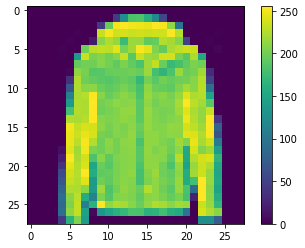

In [180]:
print(train_images.shape)
print(train_labels.shape)
print(len(test_images))
plt.figure()
plt.imshow(train_images[5000])
plt.colorbar()

# **Convert the range of numbers between 0 and 1 before feeding to the network**

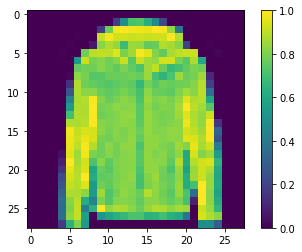

In [181]:
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure()
plt.imshow(train_images[5000])
plt.colorbar()

# **Model with Tensorflow**

## **set up the Layers**

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
#transforms the format of the images from a two-dimensional array to one dimensional array 
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10,  activation = 'softmax'))
model.summary()


## **Compile the Model**

In [0]:
# Adding a few setting during the model compile step 
#1.Loss function(measure the accuracy of the model )
#2.Optimizer(Updating the model on the basis of observed data and the loss function)
#3.Metrics(monitor the training and testing steps)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# **Model train**

In [111]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4943 - acc: 0.8242
Epoch 2/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3727 - acc: 0.8653
Epoch 3/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3356 - acc: 0.8773
Epoch 4/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3120 - acc: 0.8846
Epoch 5/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2930 - acc: 0.8920
Epoch 6/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2802 - acc: 0.8960
Epoch 7/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2681 - acc: 0.8998
Epoch 8/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2560 - acc: 0.9053
Epoch 9/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2479 - acc: 0.9077
Epoch 10/10
60000/60000 [==============================] - 

# **Evaluate accuracy**

In [112]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8872


# **Implement the model**

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# **predict Model**

In [118]:
#Predict some images with the trained model
probability_model = Sequential([model, tf.keras.layers.Softmax()])    
predictions = probability_model.predict(test_images)
predictions[1]


array([0.08544158, 0.08543948, 0.23033565, 0.08543948, 0.08608217,
       0.08543948, 0.08550376, 0.08543948, 0.08543948, 0.08543948],
      dtype=float32)

In [119]:
np.argmax(predictions[1])

2

In [120]:
test_labels[1]

2

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img )
  plt.colorbar()

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


# **Verify**

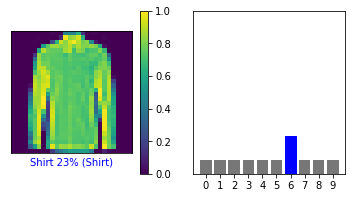

In [160]:
i = 9000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [176]:
W = tf.Variable(tf.random.normal([784,10] , mean=0 , stddev=1.0 , dtype=np.float32))
b = tf.Variable(tf.random.normal([10], mean=0 , stddev =1.0 , dtype=np.float32))


KeyboardInterrupt: ignored

In [173]:
train_steps=10
learning_rate= 0.1
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        logits = tf.matmul(img_batch, W) + b
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
    grads = tape.gradient(xent, [W, b])
    W.assign_sub(learning_rate * grads[0])
    b.assign_sub(learning_rate * grads[1])
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

KeyboardInterrupt: ignored